In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
variable_definitions = pd.read_csv('VariableDefinitions.csv')
sample_submission = pd.read_csv('SampleSubmission.csv')

In [7]:
train.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [8]:
test.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,tour_idynufedne,KOREA,25-44,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,Others,Independent,No,No,No,No,No,No,No,7,4,Yes
1,tour_id9r3y5moe,UNITED KINGDOM,45-64,With Children,1.0,1.0,Leisure and Holidays,Conference Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7,0,Yes
2,tour_idf6itml6g,ITALY,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Beach Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,No,Yes,No,No,No,0,6,Yes
3,tour_id99u4znru,KENYA,25-44,Alone,0.0,1.0,Other,Beach Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,3,4,No
4,tour_idj4i9urbx,ZAMBIA,25-44,Alone,0.0,1.0,Business,Widlife Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,6,0,No


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                18506 non-null  object 
 1   country                18506 non-null  object 
 2   age_group              18506 non-null  object 
 3   travel_with            17431 non-null  object 
 4   total_female           18504 non-null  float64
 5   total_male             18500 non-null  float64
 6   purpose                18506 non-null  object 
 7   main_activity          18506 non-null  object 
 8   info_source            18506 non-null  object 
 9   tour_arrangement       18506 non-null  object 
 10  package_transport_int  18506 non-null  object 
 11  package_accomodation   18506 non-null  object 
 12  package_food           18506 non-null  object 
 13  package_transport_tz   18506 non-null  object 
 14  package_sightseeing    18506 non-null  object 
 15  pa

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                6169 non-null   object 
 1   country                6169 non-null   object 
 2   age_group              6169 non-null   object 
 3   travel_with            5808 non-null   object 
 4   total_female           6167 non-null   float64
 5   total_male             6168 non-null   float64
 6   purpose                6169 non-null   object 
 7   main_activity          6169 non-null   object 
 8   info_source            6169 non-null   object 
 9   tour_arrangement       6169 non-null   object 
 10  package_transport_int  6169 non-null   object 
 11  package_accomodation   6169 non-null   object 
 12  package_food           6169 non-null   object 
 13  package_transport_tz   6169 non-null   object 
 14  package_sightseeing    6169 non-null   object 
 15  pack

In [39]:
train.isnull().sum()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18502,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18503,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18504,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
test.isnull().sum()

Tour_ID                    0
country                    0
age_group                  0
travel_with              361
total_female               2
total_male                 1
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
first_trip_tz              0
dtype: int64

In [15]:
train.duplicated().sum()

0

In [16]:
test.duplicated().sum()

0

In [45]:
train[train['total_female'].isna()]

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
7627,tour_idsgxazh59,FRANCE,25-44,With Other Friends/Relatives,NaN,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,9,5,Yes,Lower Cost
8388,tour_id1kmucs2v,ITALY,18-24,With Other Friends/Relatives,NaN,4.0,Volunteering,Wildlife Tourism,"Friends, relatives",Independent,...,No,No,No,No,No,No,15,0,Yes,High Cost


In [44]:
train[train['total_male'].isna()]

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
6195,tour_idcfe5lv3z,SOUTH AFRICA,25-44,With Other Friends/Relatives,0.0,NaN,Meetings and Conference,Wildlife Tourism,"Newspaper, magazines, brochures",Independent,...,No,No,No,No,No,No,4,0,Yes,Normal Cost
7092,tour_idzmkp9sq6,CHINA,25-44,With Other Friends/Relatives,10.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,4,2,Yes,Highest Cost
9350,tour_idgxm5bafr,SPAIN,45-64,With Other Friends/Relatives,7.0,NaN,Other,Hunting Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,Yes,11,0,No,Highest Cost
9571,tour_idaqxaa6li,FRANCE,25-44,NaN,0.0,NaN,Leisure and Holidays,Conference Tourism,"Radio, TV, Web",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,6,0,Yes,Normal Cost
13076,tour_id7rzn4czm,GERMANY,45-64,With Other Friends/Relatives,4.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,23,0,No,Higher Cost
15585,tour_id41dez9e2,NETHERLANDS,45-64,With Other Friends/Relatives,11.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,No,Yes,No,No,Yes,No,5,0,Yes,Higher Cost


In [24]:
train.nunique()

Tour_ID                  18506
country                    131
age_group                    5
travel_with                  5
total_female                24
total_male                  24
purpose                      8
main_activity               10
info_source                  8
tour_arrangement             2
package_transport_int        2
package_accomodation         2
package_food                 2
package_transport_tz         2
package_sightseeing          2
package_guided_tour          2
package_insurance            2
night_mainland             110
night_zanzibar              60
first_trip_tz                2
cost_category                6
dtype: int64

In [25]:
test.nunique()

Tour_ID                  6169
country                   118
age_group                   5
travel_with                 5
total_female               19
total_male                 18
purpose                     8
main_activity              10
info_source                 8
tour_arrangement            2
package_transport_int       2
package_accomodation        2
package_food                2
package_transport_tz        2
package_sightseeing         2
package_guided_tour         2
package_insurance           2
night_mainland             91
night_zanzibar             44
first_trip_tz               2
dtype: int64

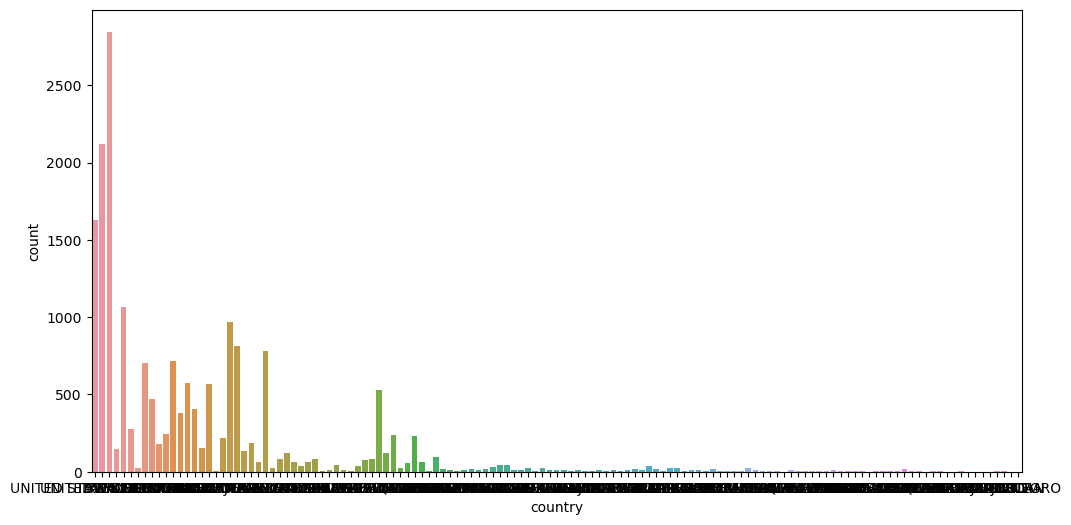

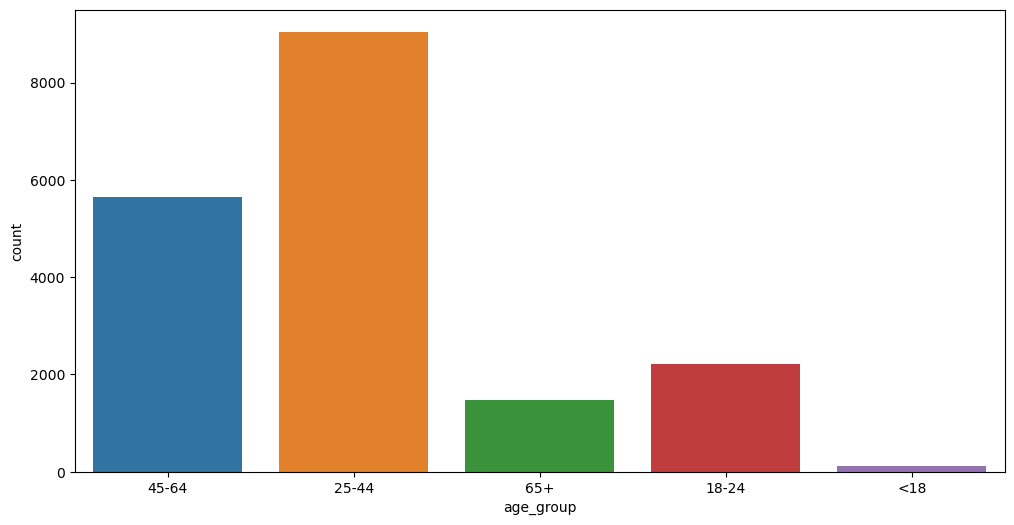

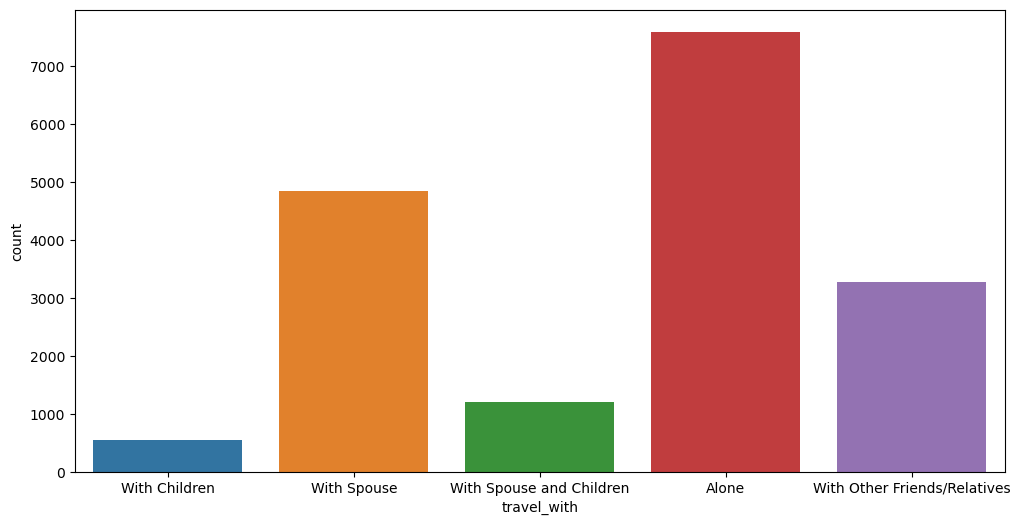

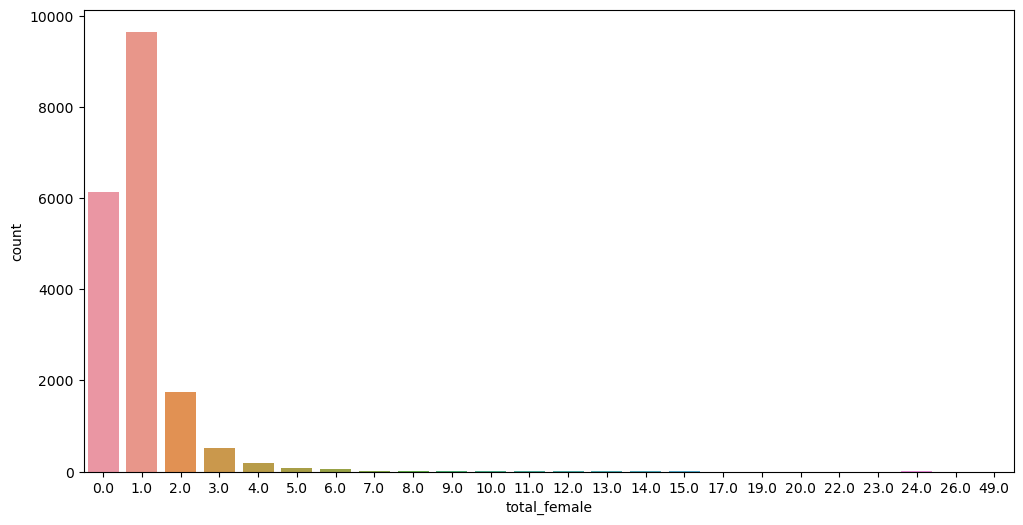

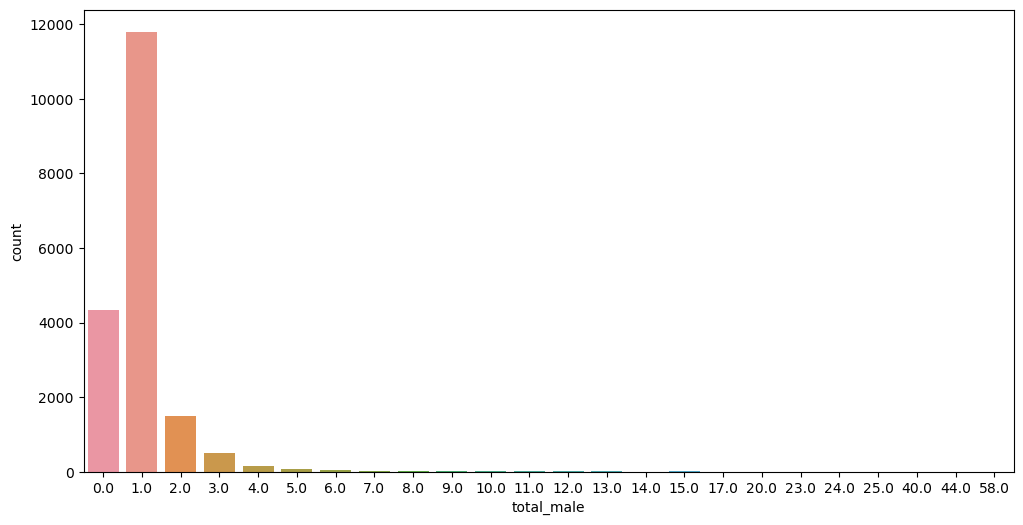

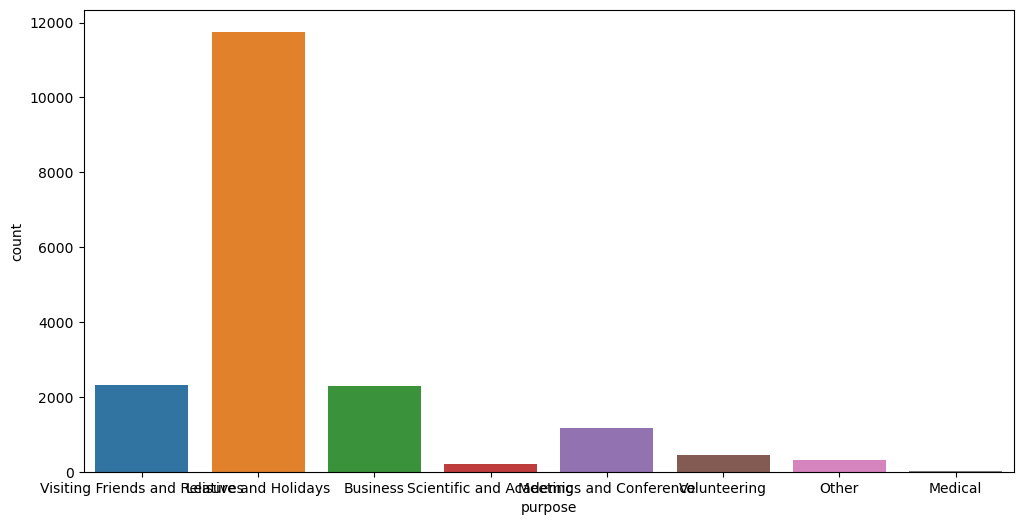

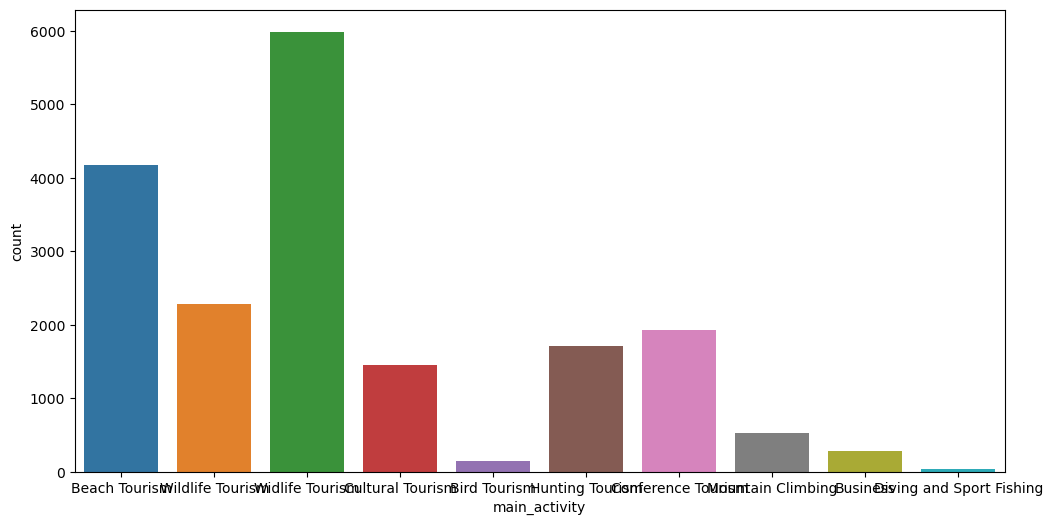

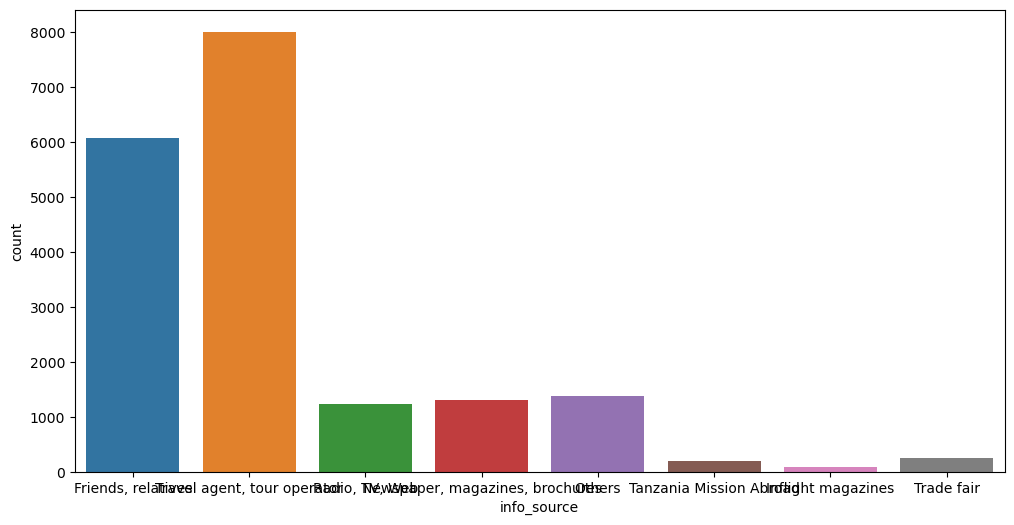

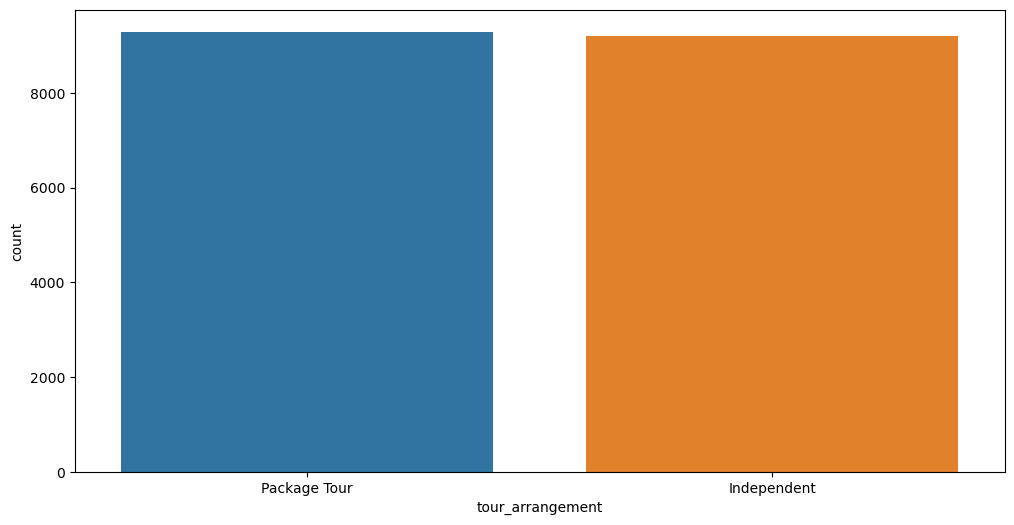

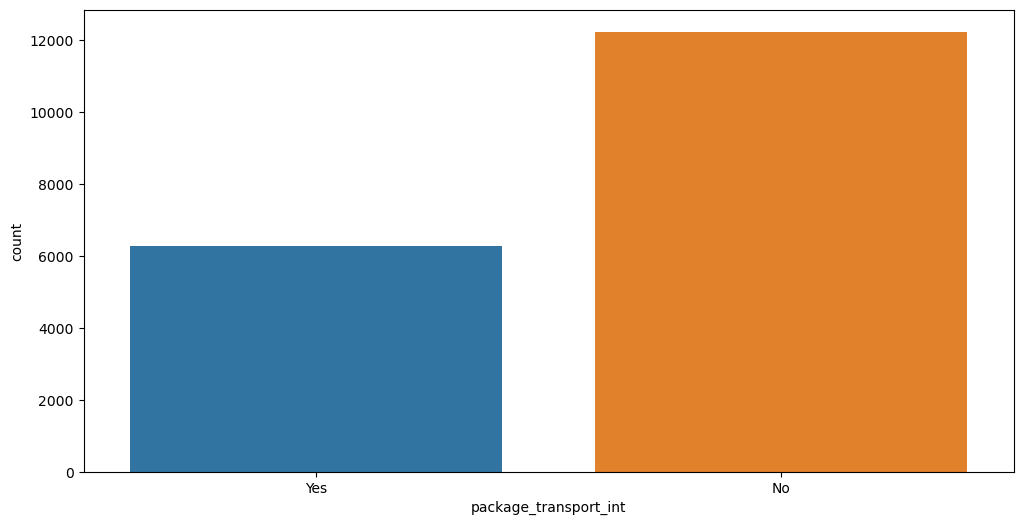

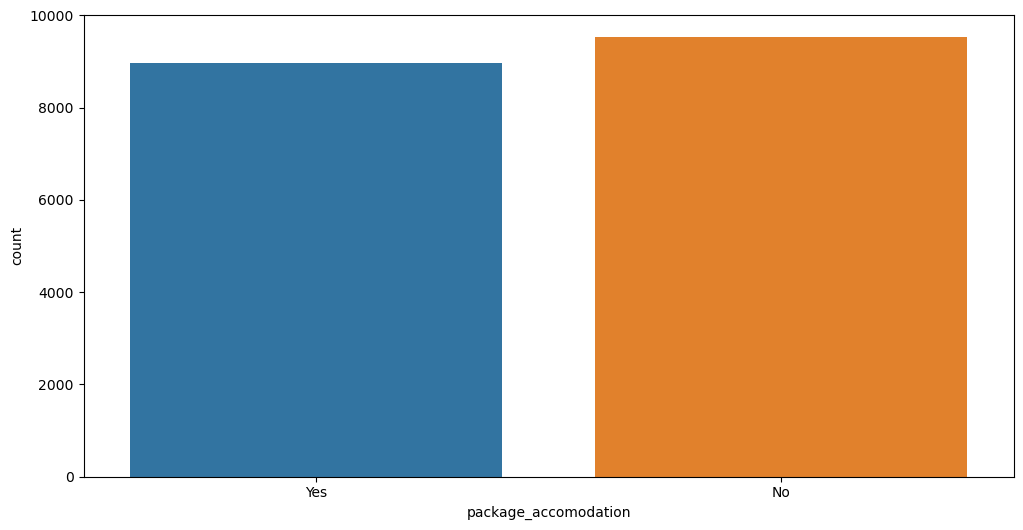

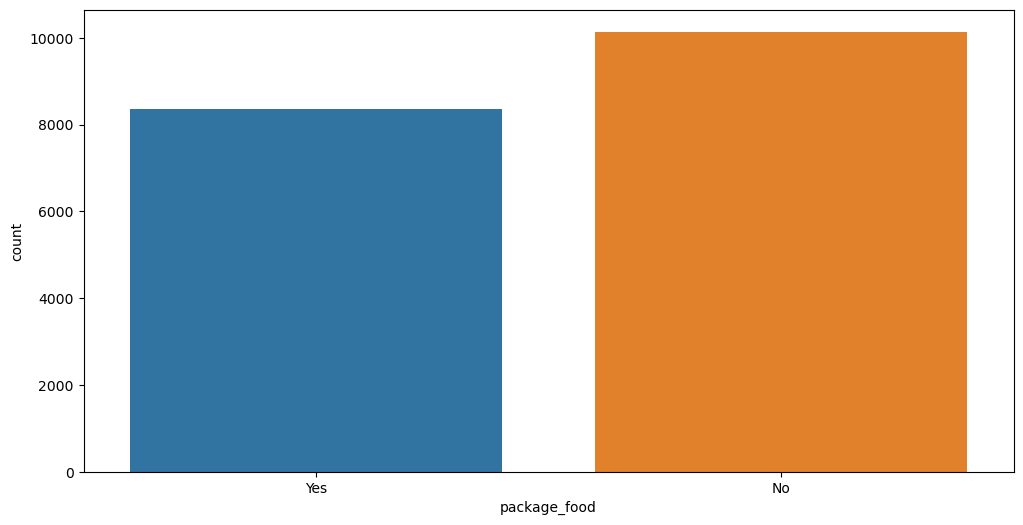

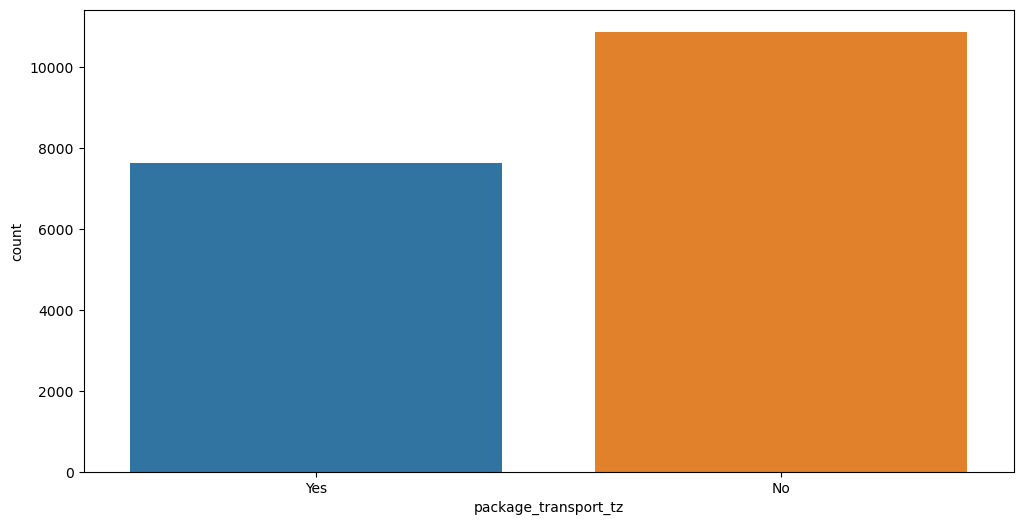

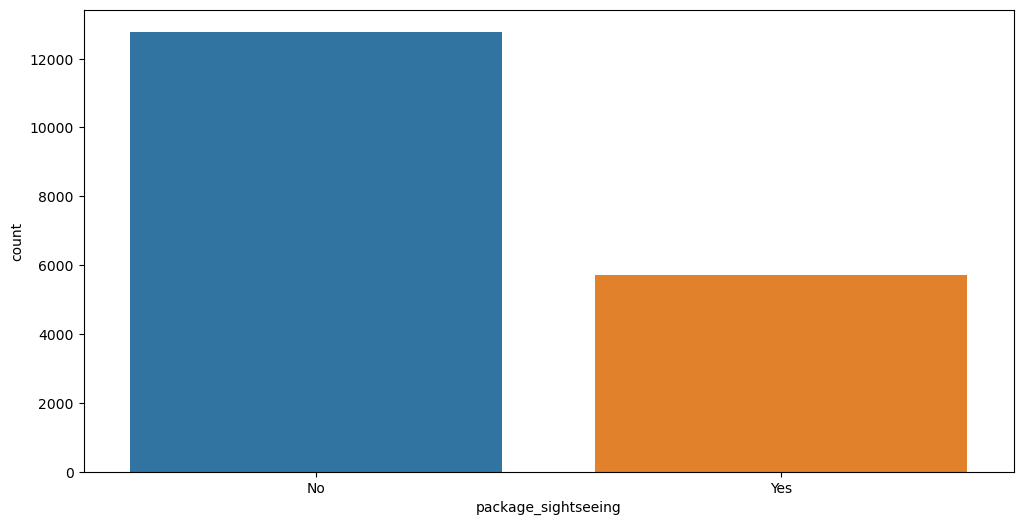

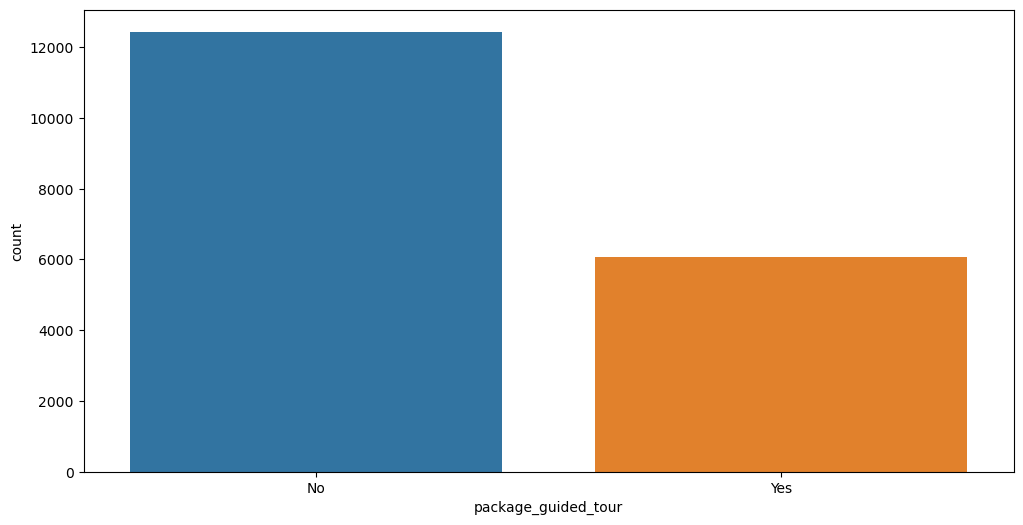

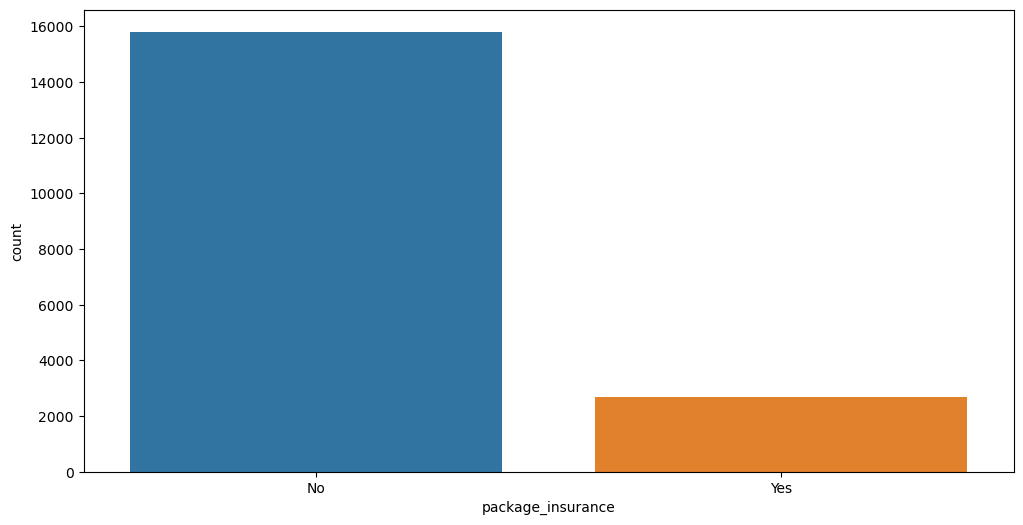

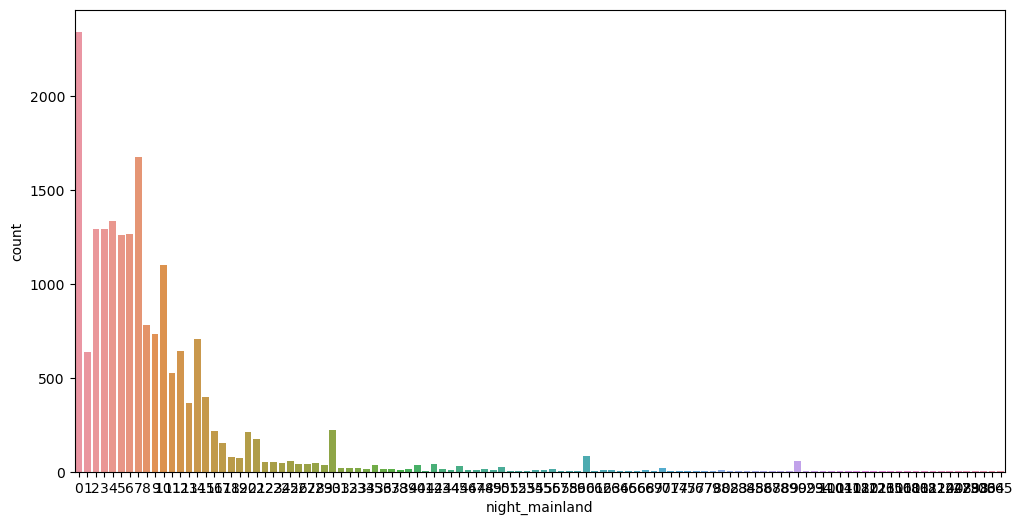

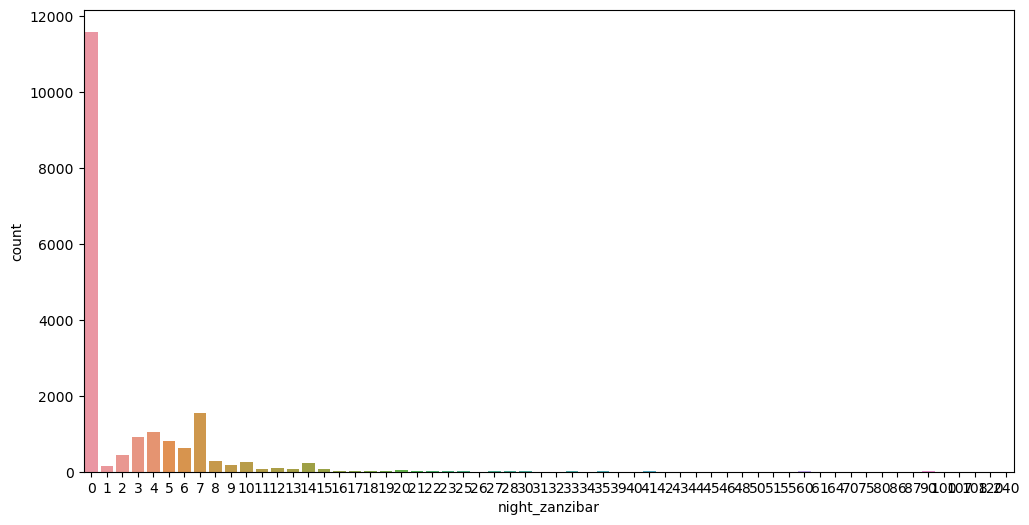

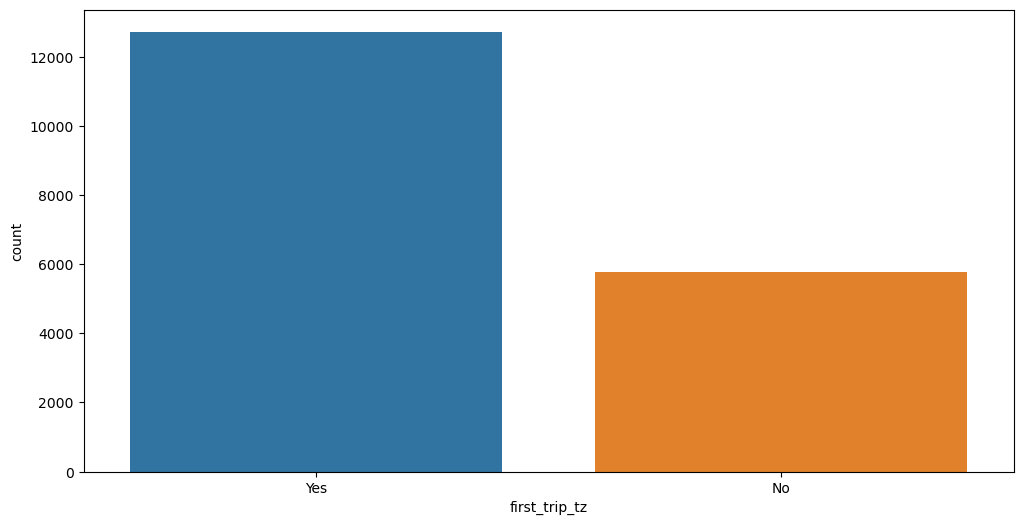

In [35]:
for k in train.columns[1:-1]:
    plt.figure(figsize=(12,6))
    sns.countplot(x=k,data=train)

In [34]:
train['travel_with']=train['travel_with'].fillna('Alone')
train=train.dropna()
train.isnull().sum()

Tour_ID                  0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
cost_category            0
dtype: int64

In [41]:
train_encoded = pd.get_dummies(train, columns = ['first_trip_tz','tour_arrangement','package_transport_int', 'package_accomodation','package_food', 'package_transport_tz','package_sightseeing','package_guided_tour',
'package_insurance'])
train_encoded.dtypes

Tour_ID                           object
country                           object
age_group                         object
travel_with                       object
total_female                     float64
total_male                       float64
purpose                           object
main_activity                     object
info_source                       object
night_mainland                     int64
night_zanzibar                     int64
cost_category                     object
total_travelers                  float64
first_trip_tz_No                   uint8
first_trip_tz_Yes                  uint8
tour_arrangement_Independent       uint8
tour_arrangement_Package Tour      uint8
package_transport_int_No           uint8
package_transport_int_Yes          uint8
package_accomodation_No            uint8
package_accomodation_Yes           uint8
package_food_No                    uint8
package_food_Yes                   uint8
package_transport_tz_No            uint8
package_transpor

In [51]:

train_encoded['total_travelers']=train_encoded['total_male']+train_encoded['total_female']
X = train_encoded[['total_travelers','tour_arrangement_Independent','package_transport_int_Yes', 'package_accomodation_Yes','package_food_Yes', 'package_transport_tz_Yes','package_sightseeing_Yes','package_guided_tour_Yes',
'package_insurance_Yes']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                        feature        VIF
0               total_travelers   1.930709
1  tour_arrangement_Independent   1.312881
2     package_transport_int_Yes   3.092415
3      package_accomodation_Yes  13.970470
4              package_food_Yes  10.301156
5      package_transport_tz_Yes   6.444313
6       package_sightseeing_Yes   3.736685
7       package_guided_tour_Yes   4.173928
8         package_insurance_Yes   1.563868
